<a href="https://colab.research.google.com/github/abigailvania99/machineLearning/blob/main/XOR_Backpropagation_Neural_Network_Abigail_Vania_(2402345072).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Backpropagation Neural Network XOR

Nama : Abigail Vania <br>
NIM : 2402345072 <br>
Tujuan dilakukannya backpropagation adalah mencari bobot dan bias yang optimal agar dapat memprediksi atau klasifikasi dengan tingkat akurasi yang tinggi

####1. Import library numpy
library ini digunakan untuk perhitungan matriks dan exponensial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

####2. Membuat function Sigmoid dan derivative Sigmoid
Fungsi aktivatis yang digunakan adalah sigmoid, di mana sigmoid digunakan untuk feedforward dan derivative sigmoid digunakan untuk backpropagation

In [ ]:
def sigmoid(n):
  return 1/(1+ np.exp(-n))

def derivative_sigmoid(n):
  return n * (1-n)



####3. Menentukan data dan target XOR

In [ ]:
x = np.array([[0, 0],[1, 0],[0, 1],[1, 1]])
y = np.array([[0],[1],[1],[0]])

####4. Melakukan inisialisasi bobot dan bias serta variabel lainnya agar dapat digunakan dan diupdate di semua function

function initial_variabel dibuat karena variabel yang digunakan adalah global agar dapat digunakan di semua function. Apabila setelah di run value pada variabel tersebut masih tersimpan, maka perlu melakukan insialisasi ulang.

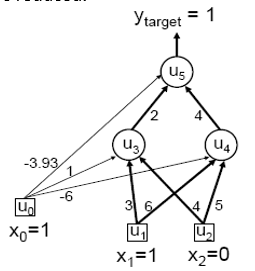

In [ ]:
errors = 0
hidden_layer_input = None
hidden_layer_output = None
output_layer_input = None
output_layer_output = None
delta_output = delta_hidden_layer = None
bobot_hidden_layer = None
bias_hidden_layer = None
bobot_output_layer = None
bias_output_layer = None
sse = np.array([])

def initial_variabel():
  global bobot_hidden_layer, bias_hidden_layer, bobot_output_layer, bias_output_layer, hidden_layer_output, hidden_layer_input, output_layer_input, output_layer_output
  global errors, delta_output, delta_hidden_layer, sse

  bobot_hidden_layer = np.array([[3.0,6.0], [4.0,5.0]])
  bias_hidden_layer = np.array([[1.0,-6.0]])
  bobot_output_layer = np.array([[2.0],[4.0]])
  bias_output_layer = np.array ([[-3.93]])

  errors = 0
  hidden_layer_input = None
  hidden_layer_output = None
  output_layer_input = None
  output_layer_output = None
  delta_output = delta_hidden_layer = None
  sse = np.array([])



####5. Menentukan Etha
Etha seringkali disebut juga learning rate. Learning rate yang digunakan adalah 0.1

In [ ]:
learning_rate = 0.1

####6. Menentukan jumlah epoch
Jumlah epoch ditentukan sebesar 2

In [ ]:
epochs = 2

####7. Membuat function feedforward

In [ ]:
def feedforward():
  global hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

  hidden_layer_input = np.dot(x, bobot_hidden_layer) + bias_hidden_layer
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, bobot_output_layer) + bias_output_layer
  output_layer_output = sigmoid(output_layer_input)



####8. Membuat function error

In [ ]:
def error(y, y_pred,k):
  global errors
  global sse
  errors = y-y_pred

  print(f'Epoch {k+1}, Sum of Squared Error (SSE): {np.sum(errors**2)}')
  print(f'Error of Epoch {k+1}')
  print(errors)
  sse = np.append(sse, [np.sum(errors**2)])



####9. Membuat fuction backpropagation

In [ ]:
def backpropagation():
  global delta_output, delta_hidden_layer, errors, output_layer_output, hidden_layer_output
  delta_output = errors *derivative_sigmoid(output_layer_output)
  delta_hidden_layer = np.dot(delta_output, bobot_output_layer.T) * derivative_sigmoid(hidden_layer_output)


####10. Membuat function update bobot dan bias

In [ ]:
def update():
  global bobot_output_layer, bias_output_layer, bobot_hidden_layer, bias_hidden_layer, hidden_layer_output, delta_output, delta_hidden_layer
  bobot_output_layer += np.dot(hidden_layer_output.T, delta_output) * learning_rate
  bias_output_layer += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

  bobot_hidden_layer += np.dot(x.T, delta_hidden_layer) * learning_rate
  bias_hidden_layer += np.sum(delta_hidden_layer, axis=0, keepdims=True) * learning_rate



####11. Membuat function neuron
Tahap ini menggabungkan semua function yang telah dibuat dengan algoritma, feedforward, error, backpropagation, dan update bobot dan bias sebanyak epoch

In [ ]:
def neuron(epoch):
  initial_variabel()
  for k in range(epoch):
    feedforward()
    error(y, output_layer_output, k)
    backpropagation()
    update()
  x = [i for i in range(1, epoch+1)]
  plt.plot(x, sse)
  plt.xlabel('Epoch')
  plt.ylabel('Sum of Squared Error (SSE)')
  plt.title('SSE vs. Epoch learning Rate = 0.1')
  plt.grid(True)
  plt.show()

  #feedforward()
  print("Hasil Prediksi:")
  print(output_layer_output)

####12. Melakukan prediksi dengan 1 epoch

Epoch 1, Sum of Squared Error (SSE): 1.527320428196064
Error of Epoch 1
[[-0.07885605]
 [ 0.49149393]
 [ 0.70425023]
 [-0.88519347]]


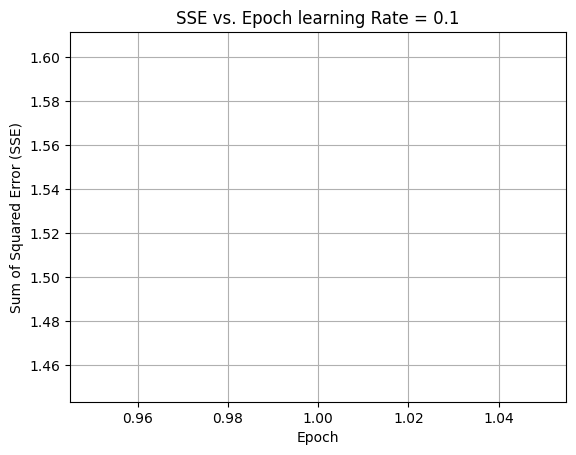

Hasil Prediksi:
[[0.07885605]
 [0.50850607]
 [0.29574977]
 [0.88519347]]


In [ ]:
neuron(1)

####13. Melakukan prediksi dengan 2 epoch

Epoch 1, Sum of Squared Error (SSE): 1.527320428196064
Error of Epoch 1
[[-0.07885605]
 [ 0.49149393]
 [ 0.70425023]
 [-0.88519347]]
Epoch 2, Sum of Squared Error (SSE): 1.4988683008409953
Error of Epoch 2
[[-0.0810904 ]
 [ 0.47388563]
 [ 0.69107741]
 [-0.88889655]]


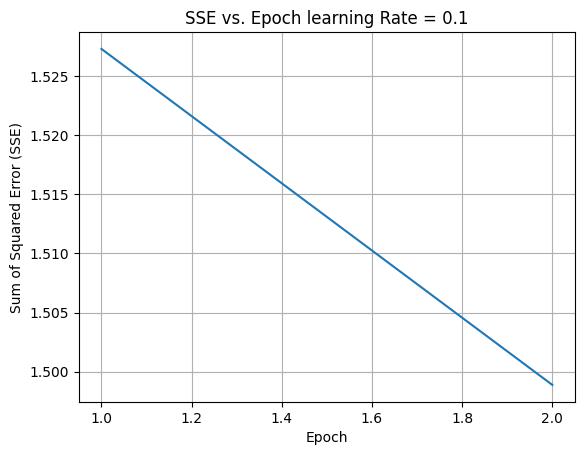

Hasil Prediksi:
[[0.0810904 ]
 [0.52611437]
 [0.30892259]
 [0.88889655]]


In [ ]:
neuron(epochs)

####14. Melakukan prediksi dengan 3 epoch

Epoch 1, Sum of Squared Error (SSE): 1.527320428196064
Error of Epoch 1
[[-0.07885605]
 [ 0.49149393]
 [ 0.70425023]
 [-0.88519347]]
Epoch 2, Sum of Squared Error (SSE): 1.4988683008409953
Error of Epoch 2
[[-0.0810904 ]
 [ 0.47388563]
 [ 0.69107741]
 [-0.88889655]]
Epoch 3, Sum of Squared Error (SSE): 1.4709774278977177
Error of Epoch 3
[[-0.08335686]
 [ 0.45657046]
 [ 0.67754411]
 [-0.8924721 ]]


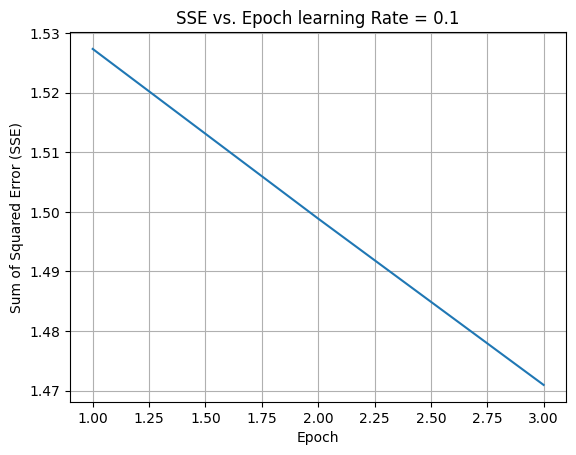

Hasil Prediksi:
[[0.08335686]
 [0.54342954]
 [0.32245589]
 [0.8924721 ]]


In [ ]:
neuron(3)

#### Prediksi dengan 20000 epoch

Streaming output truncated to the last 5000 lines.
 [ 0.33448668]
 [-0.66694836]]
Epoch 19168, Sum of Squared Error (SSE): 0.6696335350524851
Error of Epoch 19168
[[-0.03125237]
 [ 0.33459742]
 [ 0.33448663]
 [-0.66694834]]
Epoch 19169, Sum of Squared Error (SSE): 0.6696333871715472
Error of Epoch 19169
[[-0.03125156]
 [ 0.33459736]
 [ 0.33448658]
 [-0.66694832]]
Epoch 19170, Sum of Squared Error (SSE): 0.6696332393038777
Error of Epoch 19170
[[-0.03125075]
 [ 0.3345973 ]
 [ 0.33448653]
 [-0.6669483 ]]
Epoch 19171, Sum of Squared Error (SSE): 0.6696330914494746
Error of Epoch 19171
[[-0.03124994]
 [ 0.33459724]
 [ 0.33448648]
 [-0.66694829]]
Epoch 19172, Sum of Squared Error (SSE): 0.6696329436083361
Error of Epoch 19172
[[-0.03124914]
 [ 0.33459718]
 [ 0.33448643]
 [-0.66694827]]
Epoch 19173, Sum of Squared Error (SSE): 0.6696327957804608
Error of Epoch 19173
[[-0.03124833]
 [ 0.33459712]
 [ 0.33448638]
 [-0.66694825]]
Epoch 19174, Sum of Squared Error (SSE): 0.6696326479658467
Error 

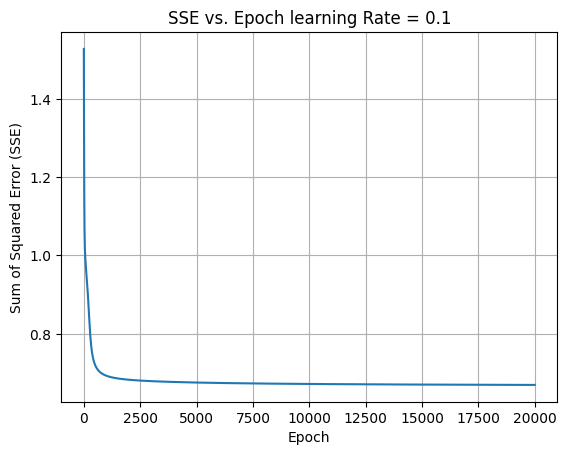

Hasil Prediksi:
[[0.03059878]
 [0.66545164]
 [0.66555362]
 [0.66693451]]


In [ ]:
neuron(20000)

#### Prediksi dengan 100 000 epoch

Streaming output truncated to the last 5000 lines.
 [ 0.03916128]
 [-0.04692451]]
Epoch 99168, Sum of Squared Error (SSE): 0.006285769208237195
Error of Epoch 99168
[[-0.03190114]
 [ 0.03915523]
 [ 0.03915848]
 [-0.04692086]]
Epoch 99169, Sum of Squared Error (SSE): 0.006284899556444677
Error of Epoch 99169
[[-0.03189973]
 [ 0.03915244]
 [ 0.03915569]
 [-0.04691722]]
Epoch 99170, Sum of Squared Error (SSE): 0.006284030144665732
Error of Epoch 99170
[[-0.03189831]
 [ 0.03914965]
 [ 0.0391529 ]
 [-0.04691358]]
Epoch 99171, Sum of Squared Error (SSE): 0.006283160972801883
Error of Epoch 99171
[[-0.03189689]
 [ 0.03914686]
 [ 0.0391501 ]
 [-0.04690994]]
Epoch 99172, Sum of Squared Error (SSE): 0.006282292040754674
Error of Epoch 99172
[[-0.03189547]
 [ 0.03914406]
 [ 0.03914731]
 [-0.0469063 ]]
Epoch 99173, Sum of Squared Error (SSE): 0.006281423348425769
Error of Epoch 99173
[[-0.03189406]
 [ 0.03914127]
 [ 0.03914452]
 [-0.04690266]]
Epoch 99174, Sum of Squared Error (SSE): 0.00628055489

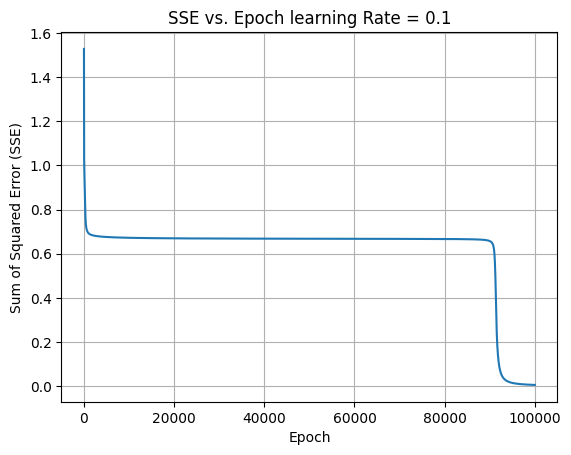

Hasil Prediksi:
[[0.03078948]
 [0.96298378]
 [0.96298127]
 [0.0441378 ]]


In [ ]:
neuron(100000)